# #Assignment 1

In [4]:
pip install tensorflow



   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 8.5 MB/s eta 0:00:45
   ---------------------------------------- 2.1/376.0 MB 6.2 MB/s eta 0:01:01
   ---------------------------------------- 3.1/376.0 MB 6.0 MB/s eta 0:01:03
   ---------------------------------------- 4.2/376.0 MB 5.9 MB/s eta 0:01:04
    --------------------------------------- 5.5/376.0 MB 5.7 MB/s eta 0:01:06
    --------------------------------------- 6.3/376.0 MB 5.4 MB/s eta 0:01:08
    --------------------------------------- 7.3/376.0 MB 5.5 MB/s eta 0:01:08
    --------------------------------------- 8.7/376.0 MB 5.5 MB/s eta 0:01:08
   - -------------------------------------- 10.0/376.0 MB 5.5 MB/s eta 0:01:07
   - -------------------------------------- 11.0/376.0 MB 5.5 MB/s eta 0:01:07
   - -------------------------------------- 12.3/376.0 MB 5.5 MB/s eta 0:01:06
   - -------------------------------------- 12.6/376.0 MB 5.5 MB/s 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# 1. Load and clean the dataset
data = pd.read_csv("HousingData.csv")


In [7]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
data = data.dropna()

In [11]:
# 2. Split into features and target
X = data.drop("MEDV", axis=1).values
y = data["MEDV"].values

In [13]:
# 3. Normalize the features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

In [15]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# 5. Build the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Linear output for regression
])

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# 6. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 7. Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1, verbose=0)

In [21]:
# 8. Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.2336 - mae: 2.4706

Test Loss (MSE): 19.0439, Test MAE: 2.4116


In [23]:
# 9. Make predictions
y_pred = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [25]:
# 10. Show sample results
print("\nSample Predictions:")
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted[0]:.2f}")


Sample Predictions:
Actual: 25.00, Predicted: 24.77
Actual: 18.60, Predicted: 20.50
Actual: 21.00, Predicted: 18.47
Actual: 23.50, Predicted: 26.51
Actual: 17.50, Predicted: 20.20


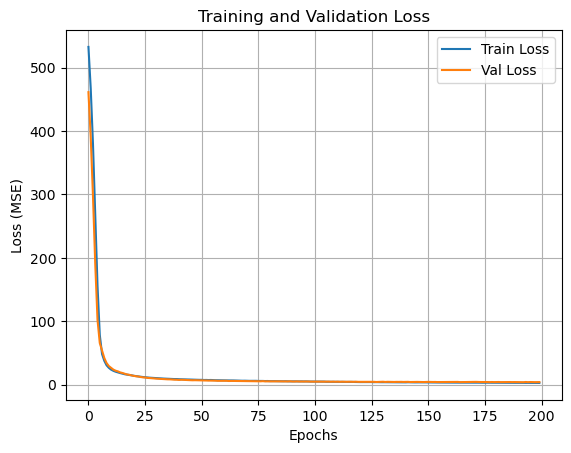

In [27]:
# 11. Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()